For Products : 841810 841840 and 841850 
China to UK Prediction 
and 
Turkey to UK Prediction 

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import seaborn as sns
%matplotlib inline

In [168]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [169]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


In [170]:
# This function is used to calculate difference -> hat feature calculation
# z is the data frame given.
# n is order number for the first columns. 
def difference(z,n):
    
    for x in range(0,n):
        # Calculate differnce value for specified columnrange
        columnname=z.columns.values.tolist()[x]    
        # Get the columnname from DataFrame
        z['{}-hat'.format(columnname)]=z['{}'.format(columnname)]-z['{}-1'.format(columnname)]
        # Subtract 'columnname' and 'columnname-1' and results and insert 'columnname_hat'
        #Example => ITC_DF1['CHN_GBR_841810_hat']=ITC_DF1['CHN_GBR_841810']-ITC_DF1['CHN_GBR_841810-1']
        
    return z

In [171]:
Product=841810
Exp_Country='TUR' # 'CHN'
Imp_Country='GBR'

if Exp_Country=='CHN':
    Currency='CNY'
    EXP0='TUR'   
elif Exp_Country=='TUR':
    Currency='TRY'
    EXP0='CHN'   

In [172]:
# Reading Excel Files

In [173]:
ITC_DF1 = pd.ExcelFile('ITC_Trade_Data\{}_{}_all.xlsx'.format(Product,Exp_Country))
ITC_DF1 = ITC_DF1.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
difference(ITC_DF1,6).columns
ITC_DF1.columns

Index(['TUR_GBR_841810', 'TUR_World_841810', 'TUR_FRA_841810',
       'TUR_USA_841810', 'TUR_ITA_841810', 'TUR_DEU_841810', 'Date', 'Year',
       'Month', 'TUR_GBR_841810-1', 'TUR_GBR_841810-2', 'TUR_GBR_841810-3',
       'TUR_GBR_841810-4', 'TUR_GBR_841810-5', 'TUR_GBR_841810-6',
       'TUR_GBR_841810-7', 'TUR_GBR_841810-8', 'TUR_GBR_841810-12',
       'TUR_World_841810-1', 'TUR_World_841810-2', 'TUR_World_841810-3',
       'TUR_World_841810-4', 'TUR_World_841810-5', 'TUR_World_841810-6',
       'TUR_World_841810-7', 'TUR_World_841810-8', 'TUR_World_841810-12',
       'TUR_USA_841810-1', 'TUR_USA_841810-2', 'TUR_USA_841810-3',
       'TUR_USA_841810-4', 'TUR_USA_841810-5', 'TUR_USA_841810-6',
       'TUR_USA_841810-7', 'TUR_USA_841810-8', 'TUR_USA_841810-12',
       'TUR_DEU_841810-1', 'TUR_DEU_841810-2', 'TUR_DEU_841810-3',
       'TUR_DEU_841810-4', 'TUR_DEU_841810-5', 'TUR_DEU_841810-6',
       'TUR_DEU_841810-7', 'TUR_DEU_841810-8', 'TUR_DEU_841810-12',
       'TUR_FRA_841810-1'

In [174]:
ITC_DF2 = pd.ExcelFile('ITC_Trade_Data\{}_{}_all.xlsx'.format(Product,Imp_Country))
ITC_DF2 = ITC_DF2.parse('Sheet1', header=0,index_col=None, na_values=['NA'])


In [175]:
ITC_DF2.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-1'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-2'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-3'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-4'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-5'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-6'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-7'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-8'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)
ITC_DF2.drop('{}_{}_{}-12'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True)


In [176]:
difference(ITC_DF2,4).columns
ITC_DF2.columns

Index(['CHN_GBR_841810', 'POL_GBR_841810', 'KOR_GBR_841810', 'ITA_GBR_841810',
       'Date', 'CHN_GBR_841810-1', 'CHN_GBR_841810-2', 'CHN_GBR_841810-3',
       'CHN_GBR_841810-4', 'CHN_GBR_841810-5', 'CHN_GBR_841810-6',
       'CHN_GBR_841810-7', 'CHN_GBR_841810-8', 'CHN_GBR_841810-12',
       'POL_GBR_841810-1', 'POL_GBR_841810-2', 'POL_GBR_841810-3',
       'POL_GBR_841810-4', 'POL_GBR_841810-5', 'POL_GBR_841810-6',
       'POL_GBR_841810-7', 'POL_GBR_841810-8', 'POL_GBR_841810-12',
       'KOR_GBR_841810-1', 'KOR_GBR_841810-2', 'KOR_GBR_841810-3',
       'KOR_GBR_841810-4', 'KOR_GBR_841810-5', 'KOR_GBR_841810-6',
       'KOR_GBR_841810-7', 'KOR_GBR_841810-8', 'KOR_GBR_841810-12',
       'ITA_GBR_841810-1', 'ITA_GBR_841810-2', 'ITA_GBR_841810-3',
       'ITA_GBR_841810-4', 'ITA_GBR_841810-5', 'ITA_GBR_841810-6',
       'ITA_GBR_841810-7', 'ITA_GBR_841810-8', 'ITA_GBR_841810-12',
       'CHN_GBR_841810-hat', 'POL_GBR_841810-hat', 'KOR_GBR_841810-hat',
       'ITA_GBR_841810-hat'],
  

In [177]:
ITC_DF3 = pd.ExcelFile('ITC_Trade_Data\{}_{}_all_unit_value.xlsx'.format(Product,Imp_Country))
ITC_DF3 = ITC_DF3.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
difference(ITC_DF3,1).columns
ITC_DF3.columns

Index(['TUR_GBR_841810_UV', 'Date', 'TUR_GBR_841810_UV-1',
       'TUR_GBR_841810_UV-2', 'TUR_GBR_841810_UV-3', 'TUR_GBR_841810_UV-4',
       'TUR_GBR_841810_UV-5', 'TUR_GBR_841810_UV-6', 'TUR_GBR_841810_UV-7',
       'TUR_GBR_841810_UV-8', 'TUR_GBR_841810_UV-12', 'TUR_GBR_841810_UV-hat'],
      dtype='object')

In [178]:
#if Exp_Country=='CHN':

#    EPU_DF1 = pd.ExcelFile('Economic_Uncertainty\EPU_{}.xlsx'.format(Exp_Country))
#    EPU_DF1 = EPU_DF1.parse('Sheet1', header=0,index_col=None, na_values=['NA'])

#    difference(EPU_DF1,1)

#    EPU_DF1.columns
#else :   
#    EPU_DF1.DataFrame({'Date' : []})    

In [179]:
# EPU for Turkey does not exist yet. Therefore China's EPU is read and then dropped from dataframe
EPU_DF1 = pd.ExcelFile('Economic_Uncertainty\EPU_CHN.xlsx')
EPU_DF1 = EPU_DF1.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
difference(EPU_DF1,1)
EPU_DF1.columns

Index(['EPU_CHN', 'Date', 'EPU_CHN-1', 'EPU_CHN-2', 'EPU_CHN-3', 'EPU_CHN-4',
       'EPU_CHN-5', 'EPU_CHN-6', 'EPU_CHN-7', 'EPU_CHN-8', 'EPU_CHN-12',
       'EPU_CHN-hat'],
      dtype='object')

In [180]:
EPU_DF2 = pd.ExcelFile('Economic_Uncertainty\EPU_{}.xlsx'.format(Imp_Country))
EPU_DF2 = EPU_DF2.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
difference(EPU_DF2,1)
EPU_DF2.columns

Index(['EPU_GBR', 'Date', 'EPU_GBR-1', 'EPU_GBR-2', 'EPU_GBR-3', 'EPU_GBR-4',
       'EPU_GBR-5', 'EPU_GBR-6', 'EPU_GBR-7', 'EPU_GBR-8', 'EPU_GBR-12',
       'EPU_GBR-hat'],
      dtype='object')

In [181]:
EPU_World = pd.ExcelFile('Economic_Uncertainty\EPU_World.xlsx')
EPU_World = EPU_World.parse('Sheet1', header=0,index_col=None, na_values=['NA'])
difference(EPU_World,1)
EPU_World.columns

Index(['EPU_World', 'Date', 'EPU_World-1', 'EPU_World-2', 'EPU_World-3',
       'EPU_World-4', 'EPU_World-5', 'EPU_World-6', 'EPU_World-7',
       'EPU_World-8', 'EPU_World-12', 'EPU_World-hat'],
      dtype='object')

In [182]:
# Reading Related CSV Files

In [183]:
OECD_DF1 = pd.read_csv('OECD\BCI_CCI_CLI_GDP_{}.csv'.format(Exp_Country))
difference(OECD_DF1,4)
OECD_DF1.columns

Index(['BCI_TUR', 'CCI_TUR', 'CLI_TUR', 'GDP_TUR', 'Date', 'BCI_TUR-1',
       'BCI_TUR-2', 'BCI_TUR-3', 'BCI_TUR-4', 'BCI_TUR-5', 'BCI_TUR-6',
       'BCI_TUR-7', 'BCI_TUR-8', 'BCI_TUR-12', 'CCI_TUR-1', 'CCI_TUR-2',
       'CCI_TUR-3', 'CCI_TUR-4', 'CCI_TUR-5', 'CCI_TUR-6', 'CCI_TUR-7',
       'CCI_TUR-8', 'CCI_TUR-12', 'CLI_TUR-1', 'CLI_TUR-2', 'CLI_TUR-3',
       'CLI_TUR-4', 'CLI_TUR-5', 'CLI_TUR-6', 'CLI_TUR-7', 'CLI_TUR-8',
       'CLI_TUR-12', 'GDP_TUR-1', 'GDP_TUR-2', 'GDP_TUR-3', 'GDP_TUR-4',
       'GDP_TUR-5', 'GDP_TUR-6', 'GDP_TUR-7', 'GDP_TUR-8', 'GDP_TUR-12',
       'BCI_TUR-hat', 'CCI_TUR-hat', 'CLI_TUR-hat', 'GDP_TUR-hat'],
      dtype='object')

In [184]:
OECD_DF2 = pd.read_csv('OECD\BCI_CCI_CLI_GDP_{}.csv'.format(Imp_Country))
difference(OECD_DF2,4)
OECD_DF2.columns

Index(['BCI_GBR', 'CCI_GBR', 'CLI_GBR', 'GDP_GBR', 'Date', 'BCI_GBR-1',
       'BCI_GBR-2', 'BCI_GBR-3', 'BCI_GBR-4', 'BCI_GBR-5', 'BCI_GBR-6',
       'BCI_GBR-7', 'BCI_GBR-8', 'BCI_GBR-12', 'CCI_GBR-1', 'CCI_GBR-2',
       'CCI_GBR-3', 'CCI_GBR-4', 'CCI_GBR-5', 'CCI_GBR-6', 'CCI_GBR-7',
       'CCI_GBR-8', 'CCI_GBR-12', 'CLI_GBR-1', 'CLI_GBR-2', 'CLI_GBR-3',
       'CLI_GBR-4', 'CLI_GBR-5', 'CLI_GBR-6', 'CLI_GBR-7', 'CLI_GBR-8',
       'CLI_GBR-12', 'GDP_GBR-1', 'GDP_GBR-2', 'GDP_GBR-3', 'GDP_GBR-4',
       'GDP_GBR-5', 'GDP_GBR-6', 'GDP_GBR-7', 'GDP_GBR-8', 'GDP_GBR-12',
       'BCI_GBR-hat', 'CCI_GBR-hat', 'CLI_GBR-hat', 'GDP_GBR-hat'],
      dtype='object')

In [185]:
OECD_DF3 = pd.read_csv('OECD\PPI_{}_{}.csv'.format(Exp_Country,Imp_Country))
difference(OECD_DF3,2)
OECD_DF3.columns

Index(['PPI_TUR', 'PPI_GBR', 'Date', 'PPI_TUR-1', 'PPI_TUR-2', 'PPI_TUR-3',
       'PPI_TUR-4', 'PPI_TUR-5', 'PPI_TUR-6', 'PPI_TUR-7', 'PPI_TUR-8',
       'PPI_TUR-12', 'PPI_GBR-1', 'PPI_GBR-2', 'PPI_GBR-3', 'PPI_GBR-4',
       'PPI_GBR-5', 'PPI_GBR-6', 'PPI_GBR-7', 'PPI_GBR-8', 'PPI_GBR-12',
       'PPI_TUR-hat', 'PPI_GBR-hat'],
      dtype='object')

In [186]:
OECD_DF4 = pd.read_csv('OECD\CPI_{}_{}.csv'.format(Exp_Country,Imp_Country))
difference(OECD_DF4,2)
OECD_DF4.columns

Index(['CPI_TUR', 'CPI_GBR', 'Date', 'CPI_TUR-1', 'CPI_TUR-2', 'CPI_TUR-3',
       'CPI_TUR-4', 'CPI_TUR-5', 'CPI_TUR-6', 'CPI_TUR-7', 'CPI_TUR-8',
       'CPI_TUR-12', 'CPI_GBR-1', 'CPI_GBR-2', 'CPI_GBR-3', 'CPI_GBR-4',
       'CPI_GBR-5', 'CPI_GBR-6', 'CPI_GBR-7', 'CPI_GBR-8', 'CPI_GBR-12',
       'CPI_TUR-hat', 'CPI_GBR-hat'],
      dtype='object')

In [187]:
OECD_DF5 = pd.read_csv('OECD\{}_GBP.csv'.format(Currency))
difference(OECD_DF5,2)
OECD_DF5.columns

Index(['TRY', 'GBP', 'Date', 'TRY-1', 'TRY-2', 'TRY-3', 'TRY-4', 'TRY-5',
       'TRY-6', 'TRY-7', 'TRY-8', 'TRY-12', 'GBP-1', 'GBP-2', 'GBP-3', 'GBP-4',
       'GBP-5', 'GBP-6', 'GBP-7', 'GBP-8', 'GBP-12', 'TRY-hat', 'GBP-hat'],
      dtype='object')

In [188]:
OTHER_DF1 = pd.read_csv('Global_Trade\WorldTrade.csv')
difference(OTHER_DF1,1)
OTHER_DF1.columns

Index(['World', 'Date', 'World-1', 'World-2', 'World-3', 'World-4', 'World-5',
       'World-6', 'World-7', 'World-8', 'World-12', 'World-hat'],
      dtype='object')

In [189]:
Y=ITC_DF1.columns.values.tolist()[0].split('_')[1]
IMP1=ITC_DF1.columns.values.tolist()[2].split('_')[1]
IMP2=ITC_DF1.columns.values.tolist()[3].split('_')[1]
IMP3=ITC_DF1.columns.values.tolist()[4].split('_')[1]
IMP4=ITC_DF1.columns.values.tolist()[5].split('_')[1]

EXP1=ITC_DF2.columns.values.tolist()[1].split('_')[0]
EXP2=ITC_DF2.columns.values.tolist()[2].split('_')[0]
EXP3=ITC_DF2.columns.values.tolist()[3].split('_')[0]

In [190]:
Data_All = ITC_DF1.merge(ITC_DF2, 
                        on = 'Date',how = 'left').merge(ITC_DF3,
                        on = 'Date',how = 'left').merge(EPU_DF1, 
                        on = 'Date',how = 'left').merge(EPU_DF2, 
                                                        
                        on = 'Date',how = 'left').merge(EPU_World,
                        on = 'Date',how = 'left').merge(OECD_DF1, 
                        on = 'Date',how = 'left').merge(OECD_DF2, 
                        on = 'Date',how = 'left').merge(OECD_DF3, 
                        on = 'Date',how = 'left').merge(OECD_DF4, 
                        on = 'Date',how = 'left').merge(OECD_DF5, 
                        on = 'Date',how = 'left').merge(OTHER_DF1, 
                        on = 'Date',how = 'left')
#Data_Core_1=Data_Core_1.dropna()
Data_All=Data_All.fillna(0)
print(Data_All.columns,Data_All.shape)

Index(['TUR_GBR_841810', 'TUR_World_841810', 'TUR_FRA_841810',
       'TUR_USA_841810', 'TUR_ITA_841810', 'TUR_DEU_841810', 'Date', 'Year',
       'Month', 'TUR_GBR_841810-1',
       ...
       'World-1', 'World-2', 'World-3', 'World-4', 'World-5', 'World-6',
       'World-7', 'World-8', 'World-12', 'World-hat'],
      dtype='object', length=322) (144, 322)


In [191]:
def Monthly_data_frame_creation(Data,Exp_Country,Imp_Country,Product,Month):
    
    X=Data[
    
            [
#                '{}_{}_{}'.format(Exp_Country,Imp_Country,Product),
# -1 Month Exporters Volumes 
            '{}_{}_{}{}'.format(Exp_Country,Imp_Country,Product,Month),'{}_World_{}{}'.format(Exp_Country,Product,Month), 
            '{}_{}_{}{}'.format(Exp_Country,IMP1,Product,Month), '{}_{}_{}{}'.format(Exp_Country,IMP2,Product,Month),
            '{}_{}_{}{}'.format(Exp_Country,IMP3,Product,Month), '{}_{}_{}{}'.format(Exp_Country,IMP4,Product,Month), 
# -1 Month Importers Volumes                         
             '{}_{}_{}{}'. format(EXP0,Imp_Country,Product,Month), '{}_{}_{}{}'. format(EXP1,Imp_Country,Product,Month), 
             '{}_{}_{}{}'. format(EXP2,Imp_Country,Product,Month), '{}_{}_{}{}'. format(EXP3,Imp_Country,Product,Month), 

# -1 Month Exporters Unit Value                         
             'TUR_GBR_{}_UV{}'. format(Product,Month), 
                                
# -1 Month Politic Uncertainity                                        
             'EPU_CHN{}'.format(Month),'EPU_{}{}'.format(Imp_Country,Month), 'EPU_World{}'.format(Month), 
# -1 Month Economic Indices            
             'BCI_{}{}'.format(Exp_Country,Month), 'CCI_{}{}'.format(Exp_Country,Month), 'CLI_{}{}'.format(Exp_Country,Month),'GDP_{}{}'.format(Exp_Country,Month), 
             'BCI_{}{}'.format(Imp_Country,Month), 'CCI_{}{}'.format(Imp_Country,Month), 'CLI_{}{}'.format(Imp_Country,Month), 'GDP_{}{}'.format(Imp_Country,Month),
               'PPI_{}{}'.format(Exp_Country,Month), 'PPI_{}{}'.format(Imp_Country,Month), 
             'CPI_{}{}'.format(Exp_Country,Month), 'CPI_{}{}'.format(Imp_Country,Month), 
             '{}{}'.format(Currency,Month), 'GBP{}'.format(Month),'World{}'.format(Month),
               'Date','Year','Month']
            ]

#    print(X.columns,X.shape)
    if Exp_Country=='TUR':
        X.drop('EPU_CHN{}'.format(Month),axis=1,inplace=True, errors='ignore')
    elif Exp_Country=='CHN':
        X.drop('TUR_GBR_{}_UV{}'. format(Product,Month),axis=1,inplace=True, errors='ignore')
        #    print(X.columns,X.shape)        
    return X

In [192]:
# Creation of single X-month versions

In [193]:
X=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'')
X1=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-1')
X2=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-2')
X3=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-3')
X4=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-4')
X5=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-5')
X6=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-6')
X7=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-7')
X8=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-8')
X12=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-12')
Xhat=Monthly_data_frame_creation(Data_All,Exp_Country,Imp_Country,Product,'-hat')

In [194]:
# Creation of Y
Y=Data_All[['{}_{}_{}'.format(Exp_Country,Imp_Country,Product),'Date','Year','Month']]


In [195]:
# Creation of merged X - month versions
#X1.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True, errors='ignore')
#X2.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True, errors='ignore')
#X3.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True, errors='ignore')
#X6.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True, errors='ignore')
#X12.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True, errors='ignore')
#Xhat.drop('{}_{}_{}'.format(Exp_Country,Imp_Country,Product),axis=1,inplace=True, errors='ignore')


X_12 = X1.merge(X2, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_23 = X2.merge(X3, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_34 = X3.merge(X4, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_45 = X4.merge(X5, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_56 = X5.merge(X6, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_67 = X6.merge(X7, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)


X_123 = X_12.merge(X3, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_234 = X_23.merge(X4, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_345 = X_34.merge(X5, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_456 = X_45.merge(X6, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_567 = X_56.merge(X7, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)

X_678 = X_67.merge(X8, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)


X_1236 = X_123.merge(X6, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)


X_123456 = X_123.merge(X_456, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)


X_1236_12 = X_1236.merge(X_12, 
                        on = ['Date','Year','Month'],how = 'left',copy=False)



In [196]:
writer = pd.ExcelWriter('Data_{}_{}_{}.xlsx'.format(Exp_Country,Imp_Country,Product))
Y.to_excel(writer,'Y',index = False,)
X.to_excel(writer,'X',index = False,)
X1.to_excel(writer,'X1',index = False,)
X2.to_excel(writer,'X2',index = False,)
X3.to_excel(writer,'X3',index = False,)
X4.to_excel(writer,'X4',index = False,)
X5.to_excel(writer,'X5',index = False,)
X6.to_excel(writer,'X6',index = False,)
X12.to_excel(writer,'X12',index = False,)
Xhat.to_excel(writer,'Xhat',index = False,)

X_12.to_excel(writer,'X_12',index = False,)
X_23.to_excel(writer,'X_23',index = False,)
X_34.to_excel(writer,'X_34',index = False,)
X_45.to_excel(writer,'X_45',index = False,)
X_56.to_excel(writer,'X_56',index = False,)
X_67.to_excel(writer,'X_67',index = False,)

X_123.to_excel(writer,'X_123',index = False,)
X_234.to_excel(writer,'X_234',index = False,)
X_345.to_excel(writer,'X_345',index = False,)
X_456.to_excel(writer,'X_456',index = False,)
X_567.to_excel(writer,'X_567',index = False,)
X_678.to_excel(writer,'X_678',index = False,)

X_1236.to_excel(writer,'X_1236',index = False,)
X_123456.to_excel(writer,'X_123456',index = False,)
X_1236_12.to_excel(writer,'X_1236_12',index = False,)

writer.save()

# Pair Plots for combined data sets. 

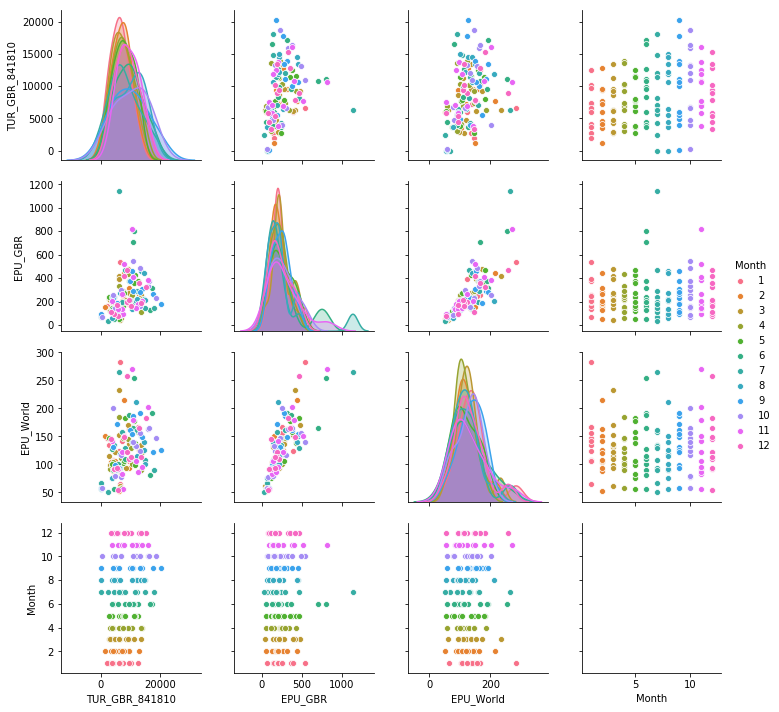

In [197]:
#PairPlot for CHINA Exports to GBR and Political Uncertainity

if Exp_Country=='TUR':
       sns_plot =  sns.pairplot(X[['{}_{}_{}'.format(Exp_Country,Imp_Country,Product),#'EPU_{}-1'.format(Exp_Country),
       'EPU_{}'.format(Imp_Country), 'EPU_World','Month'
          ]] , hue='Month' , diag_kind="kde") 
        
elif Exp_Country=='CHN':        
     sns_plot = sns.pairplot(X[['{}_{}_{}'.format(Exp_Country,Imp_Country,Product),'EPU_{}'.format(Exp_Country),
       'EPU_{}'.format(Imp_Country), 'EPU_World','Month'
          ]] , hue='Month' , diag_kind="kde") 
        
sns_plot.savefig('Plots_Data_Consolidation_Pair_Plots\Politic_Uncertainity_Pair_Plot_{}_{}_{}.png'.format(Exp_Country,Imp_Country,Product))          
        

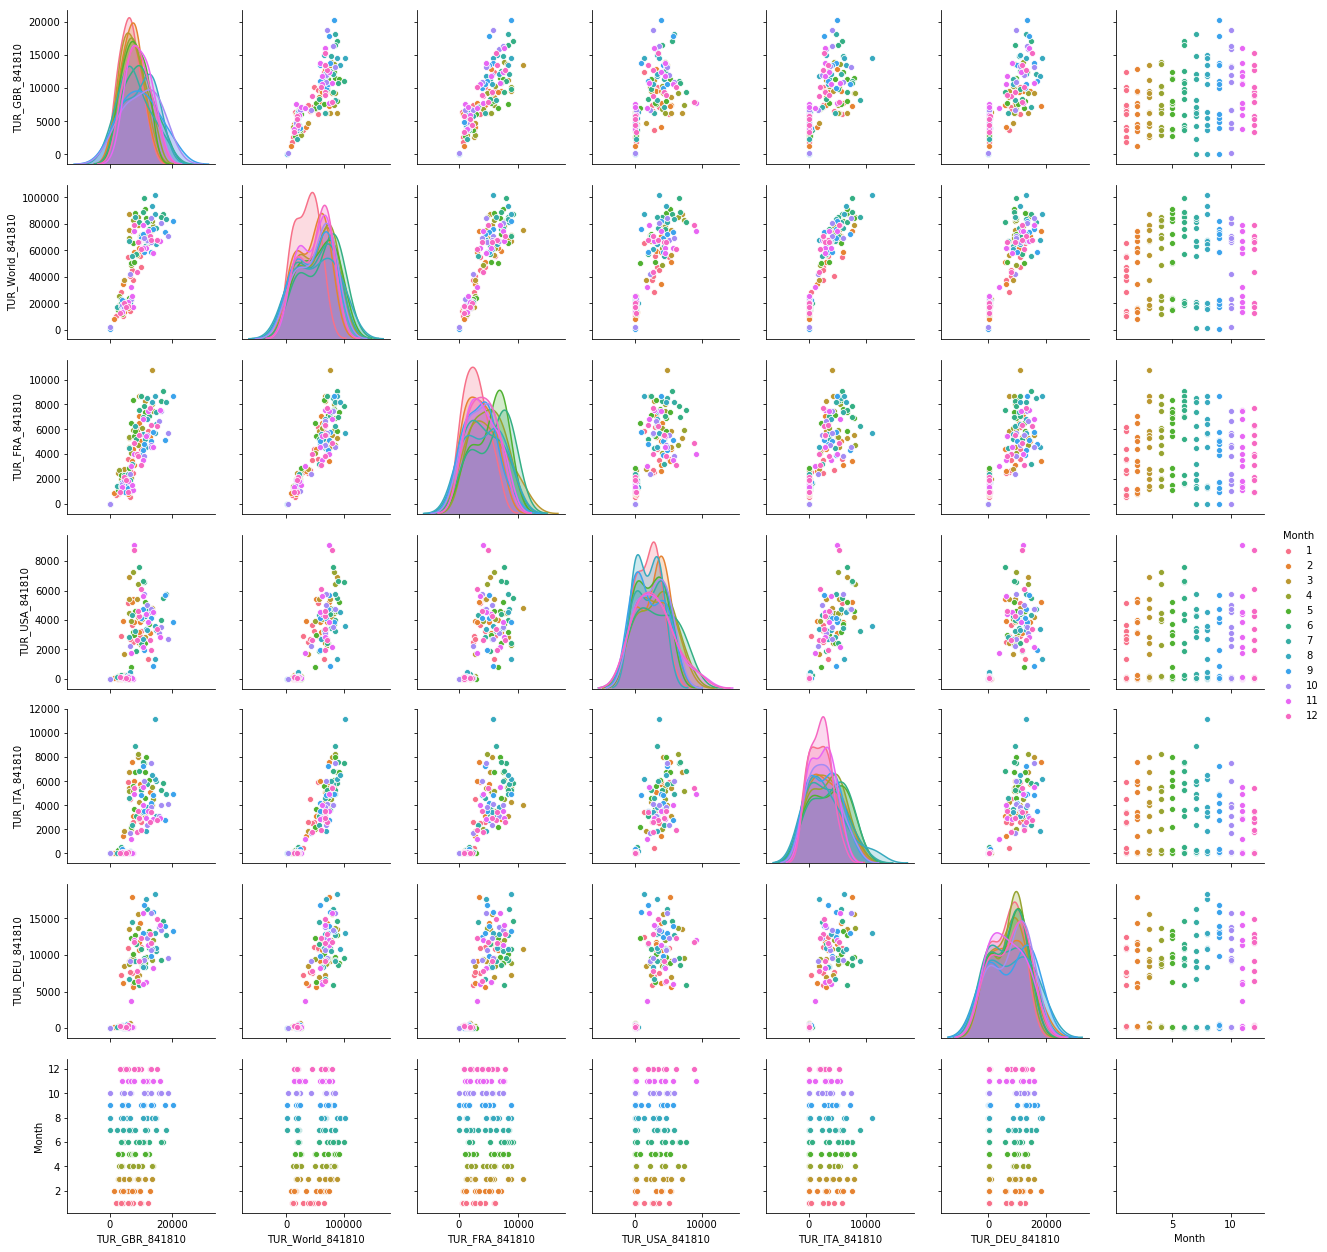

In [198]:
# Pairplots Exporters (Turkey or China)  Exports to GBR and its top 5 markets

sns_plot = sns.pairplot(X[['{}_{}_{}'.format(Exp_Country,Imp_Country,Product),
            '{}_World_{}'.format(Exp_Country,Product), 
            '{}_{}_{}'.format(Exp_Country,IMP1,Product), 
            '{}_{}_{}'.format(Exp_Country,IMP2,Product),
            '{}_{}_{}'.format(Exp_Country,IMP3,Product), 
            '{}_{}_{}'.format(Exp_Country,IMP4,Product),
            'Month'
          ]] , hue='Month' ,  diag_kind="kde") 


sns_plot.savefig('Plots_Data_Consolidation_Pair_Plots\Importers_Pair_Plot_{}_{}_{}.png'.format(Exp_Country,Imp_Country,Product))  

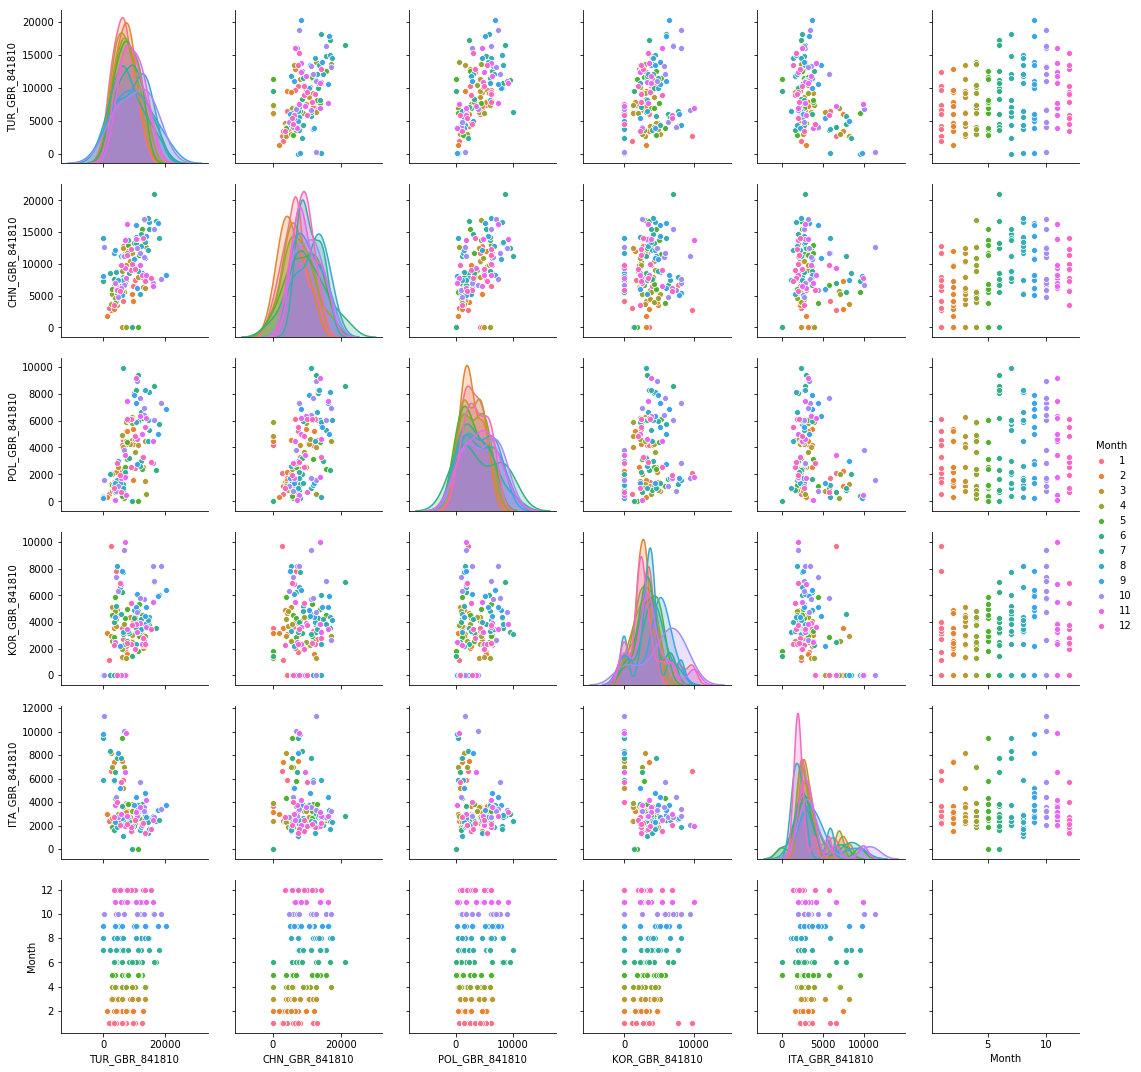

In [199]:
# Pairplots CHINA Exports to GBR and GBR top 4 exporters 
g=sns.pairplot(X[['{}_{}_{}'.format(Exp_Country,Imp_Country,Product),
                  '{}_{}_{}'. format(EXP0,Imp_Country,Product), 
                  '{}_{}_{}'. format(EXP1,Imp_Country,Product), 
                  '{}_{}_{}'. format(EXP2,Imp_Country,Product), 
                  '{}_{}_{}'. format(EXP3,Imp_Country,Product), 
                  'Month']] ,hue='Month' , diag_kind="kde")

sns_plot.savefig('Plots_Data_Consolidation_Pair_Plots\Exporters_Pair_Plot_{}_{}_{}.png'.format(Exp_Country,Imp_Country,Product))  